In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import _proofreading as p

# Data

In [2]:
#
# load the first slice of our test data
#
image, gold, segmentation = p.Util.load(0)

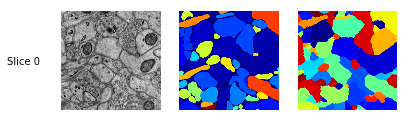

In [3]:
p.Util.view(image, gold, segmentation)

In [3]:
#
# load all slices of our test data
#
images, golds, segmentations = p.Util.load_all()

Loading..
100%

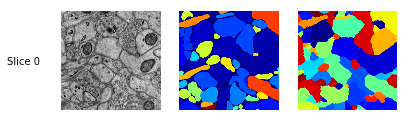

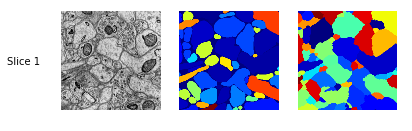

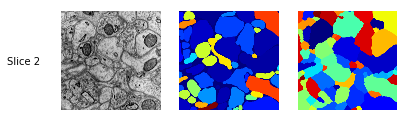

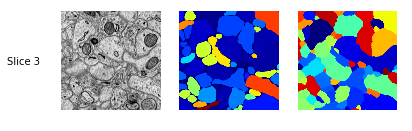

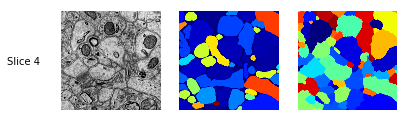

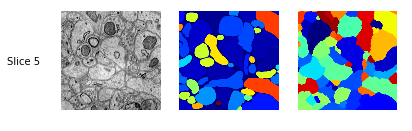

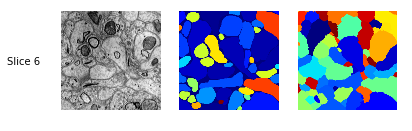

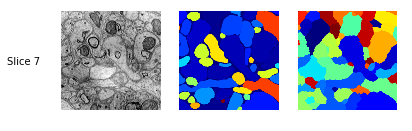

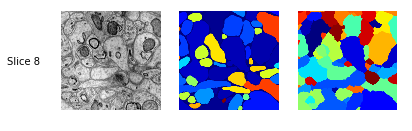

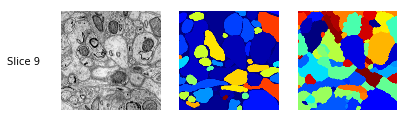

In [46]:
p.Util.view(images, golds, segmentations)

# Measures

In [12]:
#
# variation of information of our test data
# Meila 2003, Comparing Clusterings by the Variation of Information
#
p.Util.variation_of_information(golds, segmentations)

0.9760881507864134

In [49]:
#
# Adjusted Rand score of our test data
# Rand 1971, Objective Criteria for the Evaluation of Clustering Methods
#
p.Util.rand_index(golds, segmentations)

0.5135586522228454

In [15]:
#
# Edit distance of our test data
# Returns number of 2d splits, number of 3d splits, number of 3d merges
# 
p.Util.edit_distance(golds, segmentations)

(32, 6, 22)

In [4]:
users = p.Util.load_users()

In [5]:
import sys, time

In [20]:
for i,u in enumerate(users):
    data = p.Util.load_user_results(u['id'])
    
    # grab measures
    vi = p.Util.variation_of_information(golds, data)
    ri = p.Util.rand_index(golds, data)
    ed = p.Util.edit_distance(golds, data)
    ed = ed[0] + ed[2]
    
    u['vi'] = vi
    u['ri'] = ri
    u['ed'] = ed
    
    time.sleep(1)
    sys.stdout.write("\r%d%%" % ((i/float(len(users)))*100))
    sys.stdout.flush()  

90%

ValueError: not a valid TIFF file

In [21]:
users

[{'age': '26',
  'ed': 138,
  'id': 'S22',
  'occupation': 'Student CS',
  'ri': 0.38280034780100564,
  'sex': 'F',
  'tool': 'Raveler',
  'vi': 1.2933364834794254},
 {'age': '26',
  'ed': 59,
  'id': 'S23',
  'occupation': 'Administrative Assistant',
  'ri': 0.47559041583575734,
  'sex': 'F',
  'tool': 'Raveler',
  'vi': 1.0748483872514658},
 {'age': '28',
  'ed': 151,
  'id': 'S31',
  'occupation': 'Biomedical Engineer',
  'ri': 0.3512435745242203,
  'sex': 'F',
  'tool': 'Raveler',
  'vi': 1.6594483029723834},
 {'age': '31',
  'ed': 63,
  'id': 'S33',
  'occupation': 'Mother',
  'ri': 0.4981098578443215,
  'sex': 'F',
  'tool': 'Raveler',
  'vi': 1.102054857345654},
 {'age': '29',
  'ed': 48,
  'id': 'S38',
  'occupation': 'Fellow Research BWH',
  'ri': 0.5651017268169658,
  'sex': 'M',
  'tool': 'Raveler',
  'vi': 0.8581251626839457},
 {'age': '',
  'ed': 59,
  'id': 'S41',
  'occupation': 'Scientist',
  'ri': 0.5223376066695159,
  'sex': 'M',
  'tool': 'Raveler',
  'vi': 0.8985669

In [23]:
vi_tools = {'Dojo':[], 'Mojo':[], 'Raveler':[]}
ri_tools = {'Dojo':[], 'Mojo':[], 'Raveler':[]}
ed_tools = {'Dojo':[], 'Mojo':[], 'Raveler':[]}

for u in users:
    if u['tool'] == 'ITKSnap':
        continue
    vi_tools[u['tool']].append(u['vi'])
    ri_tools[u['tool']].append(u['ri'])
    ed_tools[u['tool']].append(u['ed'])

{'Dojo': [0.8687744295221593,
  1.0280295019601953,
  0.8772470205154432,
  0.9228280267376956,
  1.0079764563255056,
  0.8485155086323086,
  1.0727786456217796,
  0.7849292607703333,
  0.8773981851507227,
  0.7526550715316169],
 'Mojo': [1.3988405224938125,
  1.1417752362887397,
  1.0471267370163782,
  1.1334794092032627,
  1.0741744714295614,
  1.1068883624566102,
  1.0707135450950673,
  1.0300624281569908,
  0.9835024532487839],
 'Raveler': [1.2933364834794254,
  1.0748483872514658,
  1.6594483029723834,
  1.102054857345654,
  0.8581251626839457,
  0.8985669190647014,
  0.9424156714919185,
  1.245336661539409,
  1.0117972281902992]}

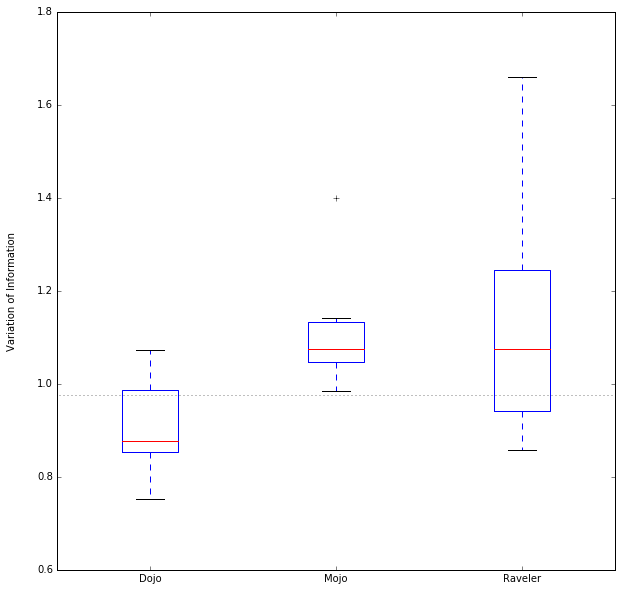

In [46]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(range(10), 10*[p.Util.variation_of_information(golds, segmentations)], 'k:', color='gray')
b = plt.boxplot([vi_tools['Dojo'],vi_tools['Mojo'],vi_tools['Raveler']])
b = plt.xticks([1,2,3],['Dojo','Mojo','Raveler'])
b = plt.ylabel('Variation of Information', labelpad=20)


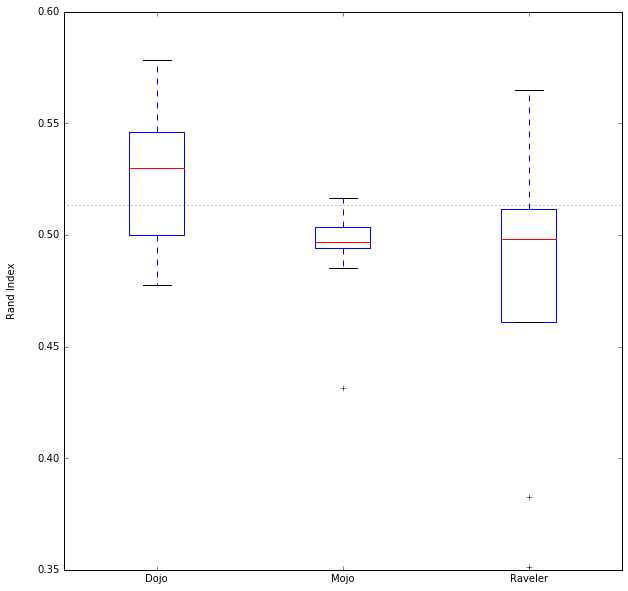

In [47]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(range(10), 10*[p.Util.rand_index(golds, segmentations)], 'k:', color='gray')
b = plt.boxplot([ri_tools['Dojo'],ri_tools['Mojo'],ri_tools['Raveler']])
b = plt.xticks([1,2,3],['Dojo','Mojo','Raveler'])
b = plt.ylabel('Rand Index', labelpad=20)

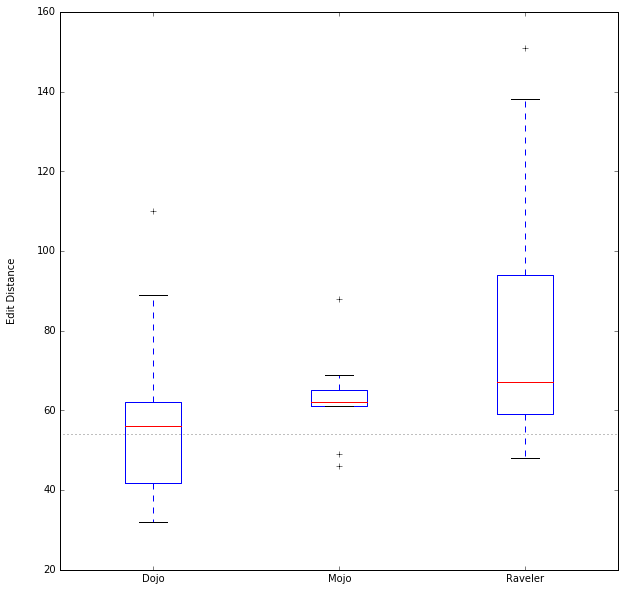

In [48]:
fig, ax = plt.subplots(figsize=(10,10))
ed = p.Util.edit_distance(golds, segmentations)
ax.plot(range(10), 10*[ed[0]+ed[2]], 'k:', color='gray')
b = plt.boxplot([ed_tools['Dojo'],ed_tools['Mojo'],ed_tools['Raveler']])
b = plt.xticks([1,2,3],['Dojo','Mojo','Raveler'])
b = plt.ylabel('Edit Distance', labelpad=20)

In [26]:
import matplotlib.pyplot as plt